In [30]:
#Network Analysis for farmers NOT in AgroCO2ncept to farmers in AgroCO2ncept
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [31]:
filename = 'paper2/9 Edges_nonpart_to_agroconcept.csv'
df = pd.read_csv(filename, delimiter = ';')

In [32]:
df

,sender_id,receiver_id,frequency_nonpart_part,friend_nonpart_part,workmate_nonpart_part,neighbour_nonpart_part,familymember_nonpart_part,partner_nonpart_part,colleague_association_nonpart_part,other_nonpart_part,contact_years
0,57,21,1.0,0,1,0,0,0,0,0,10
1,58,28,2.0,0,1,0,0,0,0,1,50
2,58,16,0.0,0,1,1,0,0,0,0,50
3,58,4,0.0,0,1,0,0,0,0,0,15
4,58,17,0.0,0,1,1,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...
140,79,54,0.0,0,1,0,0,0,0,0,20
141,79,14,0.0,0,1,1,0,0,0,0,50
142,79,55,0.0,0,1,0,0,0,0,0,10
143,79,10,0.0,1,1,0,0,0,0,0,50


In [33]:
df['relationship'] = df.friend_nonpart_part * 2**6 + df.workmate_nonpart_part * 2**5\
                   + df.neighbour_nonpart_part * 2**4 + df.familymember_nonpart_part * 2**3\
                   + df.partner_nonpart_part * 2**3 + df.colleague_association_nonpart_part * 2**2\
                   + df.other_nonpart_part * 2**1

In [34]:
# fill all NaN in the weight_col as '-1'
weight_col = 'frequency_nonpart_part'
relationship_col = 'relationship'
df.fillna(value = {weight_col:-1}, inplace=True)

In [35]:
# convert the data type from float to integer for the weight_col. 
df['frequency_nonpart_part'] = df['frequency_nonpart_part'].apply(np.int64)

In [36]:
G = nx.DiGraph()
for row in df[['sender_id', 'receiver_id', weight_col, relationship_col]].iterrows():
    u = int(row[1].sender_id)
    v = int(row[1].receiver_id)

    G.add_node(u)
    G.add_node(v)
    G.add_edge(u, v, weight=row[1][weight_col], relationship=row[1][relationship_col])

In [37]:
not_in_agro = set(df.sender_id)
in_agro = [ e for e in df.receiver_id if e not in not_in_agro ]
not_in_agro = list(not_in_agro)
in_agro = list(set(in_agro))

In [38]:
width=[G[u][v]['weight']**2 for u,v in G.edges()]
color=[G[u][v]['relationship'] for u,v in G.edges()]

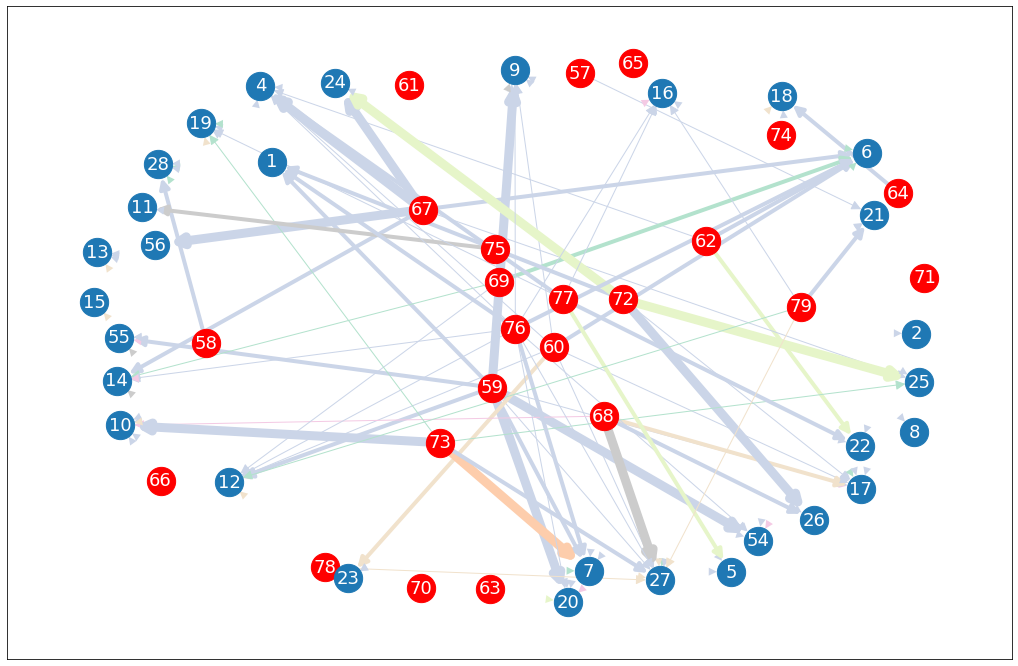

In [62]:
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, 0.8, seed=42)

nx.draw_networkx_nodes(G, pos, nodelist=not_in_agro, node_size=800, node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=in_agro, node_size=800)

nx.draw_networkx_labels(G, pos, font_size=18, font_color='white')
nx.draw_networkx_edges(G, pos, 
                       width=width,
                       edge_color=color,
                       alpha=1,
                       edge_cmap=plt.cm.Pastel2,
                       arrows=True,
                       arrowsize=20,
                       node_size=800)

plt.show()

In [47]:
# look at the number of neighbors each node has and the number of nodes it is connected to.

deg_cen = nx.degree_centrality(G)
deg_cen_sorted = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)[:5]
deg_cen_sorted

[(79, 0.3653846153846154),
 (76, 0.3269230769230769),
 (78, 0.2884615384615385),
 (60, 0.25),
 (27, 0.23076923076923078)]

In [63]:
[n for n in G.neighbors(79)]

[11, 23, 21, 7, 27, 18, 28, 16, 17, 24, 25, 9, 12, 13, 54, 14, 55, 10, 8]

In [64]:
[n for n in G.neighbors(76)]

[1, 6, 7, 27, 16, 4, 17, 2, 12, 26, 9, 13, 20, 55, 54, 14, 10]

In [48]:
#see the number of times a node acts as a bridge along the shortest path between two other nodes.

deg_bet = nx.betweenness_centrality(G)
deg_bet_sorted = sorted(deg_bet.items(), key=lambda x: x[1], reverse=True)[:5]
deg_bet_sorted

[(57, 0.0), (21, 0.0), (58, 0.0), (28, 0.0), (16, 0.0)]

In [49]:
# indicates how close a node is to all other nodes. 
#calculate the average of the shortesst path length from the node to every other node in the network

deg_clos = nx.closeness_centrality(G)
deg_clos_sorted = sorted(deg_clos.items(), key=lambda x: x[1], reverse=True)[:5]
deg_clos_sorted

[(27, 0.23076923076923078),
 (17, 0.21153846153846154),
 (4, 0.1346153846153846),
 (12, 0.1346153846153846),
 (9, 0.1346153846153846)]

In [50]:
deg_pagerank = nx.pagerank(G)
deg_pagerank_sorted = sorted(deg_pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
deg_pagerank_sorted

[(27, 0.04237161381640518),
 (21, 0.036285958861452104),
 (6, 0.032983909298053275),
 (28, 0.027777610293185175),
 (18, 0.027777610293185175)]